# Task 1: Define the Problem

In [1]:
# predict the price of a diamond

# Task 2a: Install the Needed Libraries

In [2]:
# pass

# Task 2b: Import the Needed Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from joblib import dump, load # sklearn's replacement for pickle

# Task 3: Load the Data

In [4]:
df = pd.read_csv('./diamonds.csv') # the data is in the current directory

# Task 4: Perform Exploratory Data Analysis (EDA)

## Show the Data

In [5]:
df.head() # what are x, y and z?

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

## Get Data Info

In [6]:
df.info() # 'cut', 'color' and 'clarity' are strings, the rest are numbers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


## Find Missing Values

In [7]:
df.isna().sum() # no missing values

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
# let's take a look at the string values

In [9]:
df['cut'].value_counts() # see https://en.wikipedia.org/wiki/Diamond_cut

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [10]:
df['color'].value_counts() # see https://en.wikipedia.org/wiki/Diamond_color

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [11]:
df['clarity'].value_counts() # see https://en.wikipedia.org/wiki/Diamond_clarity

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

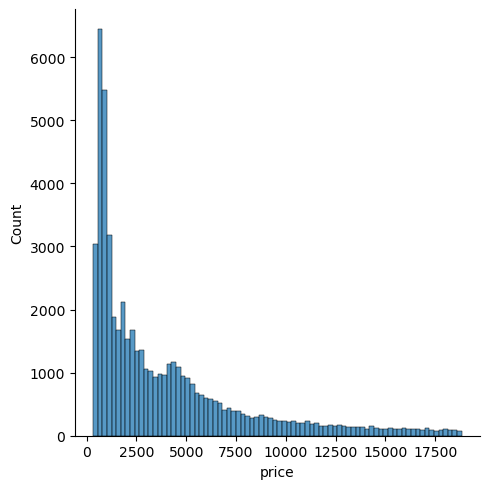

In [12]:
# what about price? Let's see the distribution

sns.displot(df['price'], kind = "hist")

# Task 5: Perform Data Cleaning

In [13]:
# convert non-numeric values to numbers
# each dictionary has quality in descending order

In [14]:
# 'cut'

dict_cut = {'Ideal': 4, 'Premium': 3, 'Very Good': 2, 'Good': 1, 'Fair': 0}
df['cut'] = df['cut'].replace(dict_cut)

In [15]:
# 'color'

dict_color = {'D': 6, 'E': 5, 'F': 4, 'G': 3, 'H': 2, 'I': 1, 'J': 0}
df['color'] = df['cut'].replace(dict_color)

In [16]:
# 'clarity'

dict_clarity = {'IF': 7, 'VVS1': 6, 'VVS2': 5, 'VS1': 4, 'VS2': 3, 'SI1': 2, 'SI2': 1, 'I1': 0}
df['clarity'] = df['cut'].replace(dict_clarity)

In [17]:
df[['cut', 'color', 'clarity']].head()

cut  color  clarity
0    4      4        4
1    3      3        3
2    1      1        1
3    3      3        3
4    1      1        1

In [18]:
df.head() # now the whole dataset is numeric

carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    4      4        4   61.5   55.0    326  3.95  3.98  2.43
1   0.21    3      3        3   59.8   61.0    326  3.89  3.84  2.31
2   0.23    1      1        1   56.9   65.0    327  4.05  4.07  2.31
3   0.29    3      3        3   62.4   58.0    334  4.20  4.23  2.63
4   0.31    1      1        1   63.3   58.0    335  4.34  4.35  2.75

In [19]:
# drop x, y, z

df = df.drop(columns = ['x', 'y', 'z'])

In [20]:
df.head()

carat  cut  color  clarity  depth  table  price
0   0.23    4      4        4   61.5   55.0    326
1   0.21    3      3        3   59.8   61.0    326
2   0.23    1      1        1   56.9   65.0    327
3   0.29    3      3        3   62.4   58.0    334
4   0.31    1      1        1   63.3   58.0    335

In [21]:
df.describe().round(2)

carat       cut     color   clarity     depth     table     price
count  53940.00  53940.00  53940.00  53940.00  53940.00  53940.00  53940.00
mean       0.80      2.90      2.90      2.90     61.75     57.46   3932.80
std        0.47      1.12      1.12      1.12      1.43      2.23   3989.44
min        0.20      0.00      0.00      0.00     43.00     43.00    326.00
25%        0.40      2.00      2.00      2.00     61.00     56.00    950.00
50%        0.70      3.00      3.00      3.00     61.80     57.00   2401.00
75%        1.04      4.00      4.00      4.00     62.50     59.00   5324.25
max        5.01      4.00      4.00      4.00     79.00     95.00  18823.00

## Look for outliers

In [22]:
# data frame of features only
df2 = df.drop(['price'], axis = 1)

array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'cut'}>],
       [<AxesSubplot:title={'center':'color'}>,
        <AxesSubplot:title={'center':'clarity'}>],
       [<AxesSubplot:title={'center':'depth'}>,
        <AxesSubplot:title={'center':'table'}>]], dtype=object)

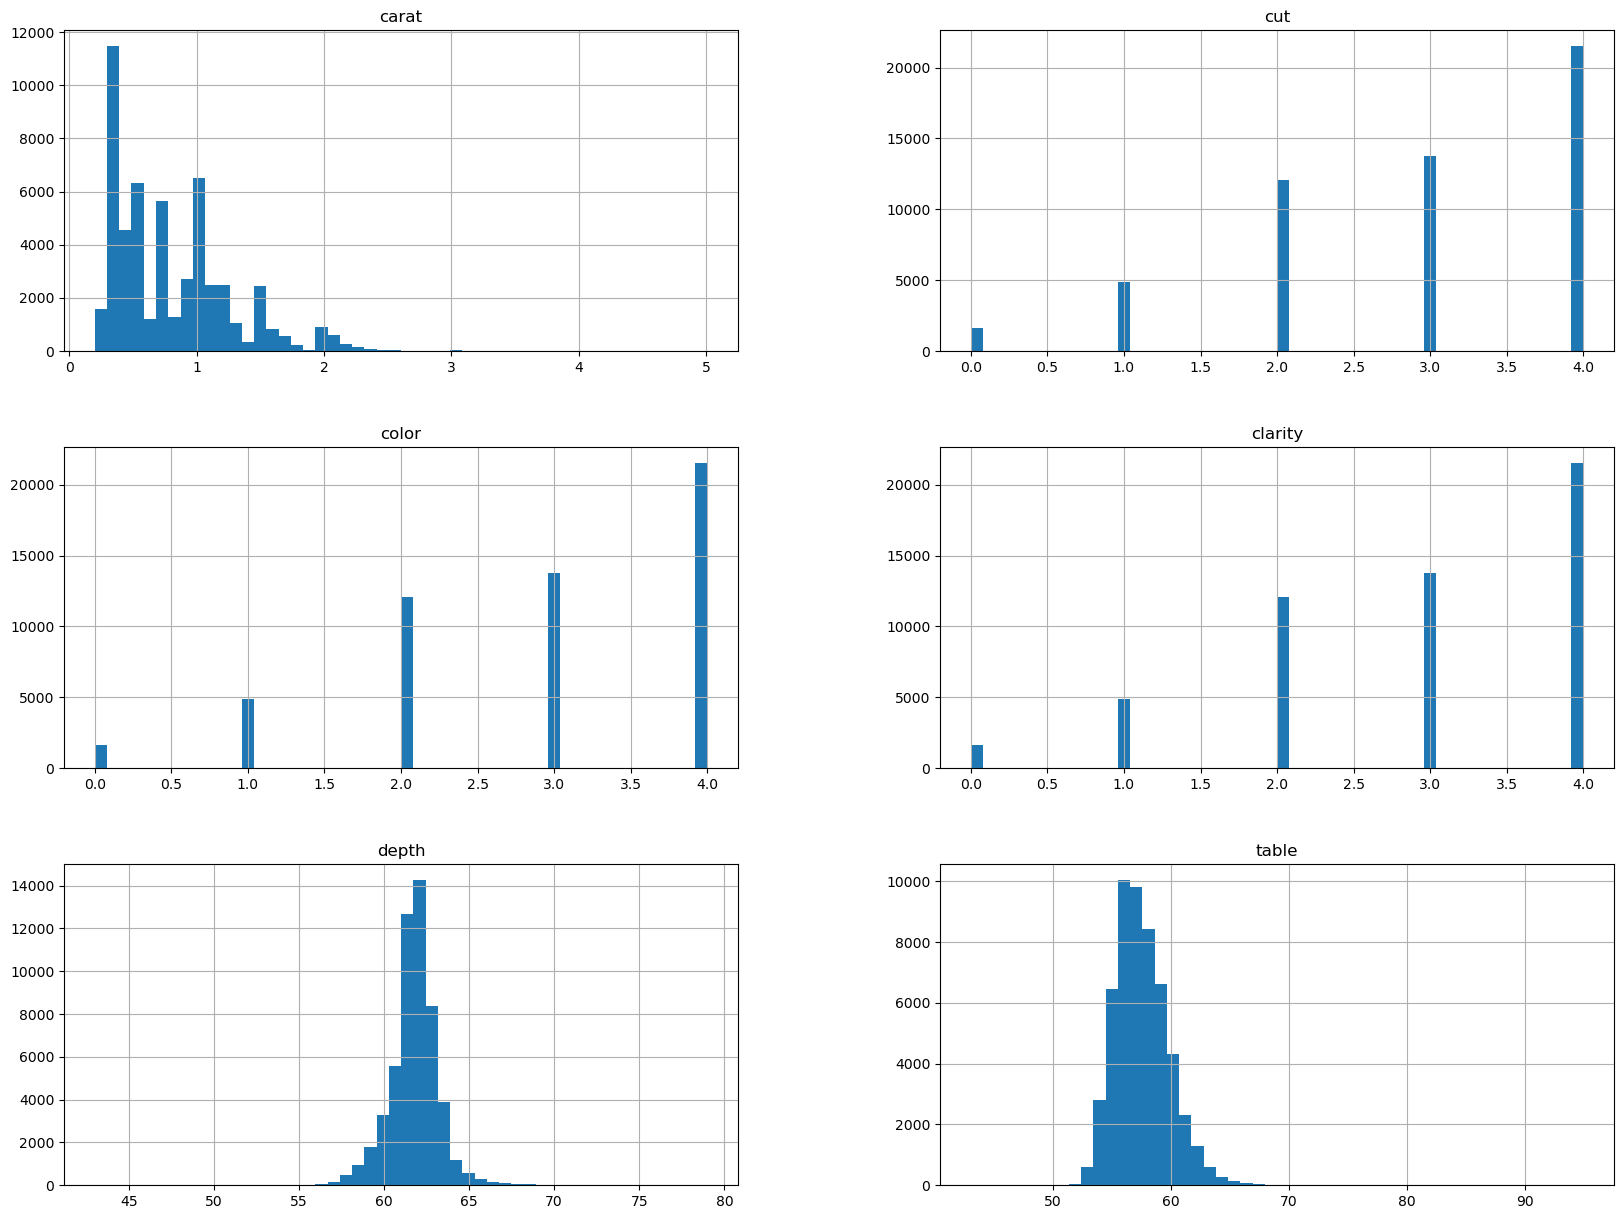

In [23]:
df2.hist(bins = 50, figsize = (20, 15)) # histograms for each feature

<AxesSubplot:>

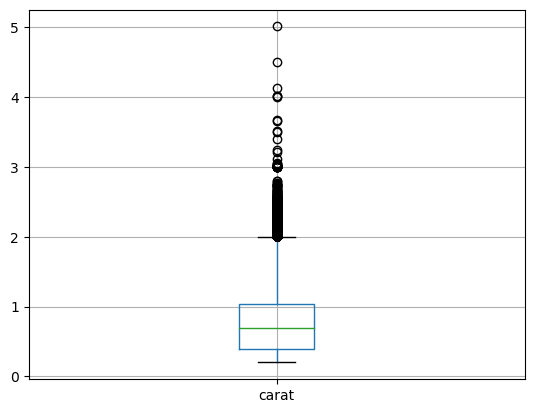

In [24]:
# 'carat' distribution is not normal
# let's see the box plot

df.boxplot(['carat'])

In [25]:
# deal with 'carat' outliers

df[['carat']].describe()

carat
count  53940.000000
mean       0.797940
std        0.474011
min        0.200000
25%        0.400000
50%        0.700000
75%        1.040000
max        5.010000

In [26]:
# outliers, continued

Q1 = df['carat'].quantile(0.25)
Q3 = df['carat'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 0.25 * IQR # define boundary for the lower end
upper_limit = Q3 + 0.25 * IQR # define boundary for the upper end

print(lower_limit)
print(upper_limit)

0.24000000000000002
1.2


In [27]:
# how many outliers on the low end?

len(df[df.carat < lower_limit])

573

In [28]:
# how many outliers on the high end?


len(df[df.carat > upper_limit])

9155

In [29]:
# drop the outliers

df = df[~((df.carat < lower_limit) | (df.carat > upper_limit))]

In [30]:
df.head() # new dataframe having dropped outliers

carat  cut  color  clarity  depth  table  price
3    0.29    3      3        3   62.4   58.0    334
4    0.31    1      1        1   63.3   58.0    335
7    0.26    2      2        2   61.9   55.0    337
10   0.30    1      1        1   64.0   55.0    339
13   0.31    4      4        4   62.2   54.0    344

# Task 6: Visualize Cleaned Up Dataset

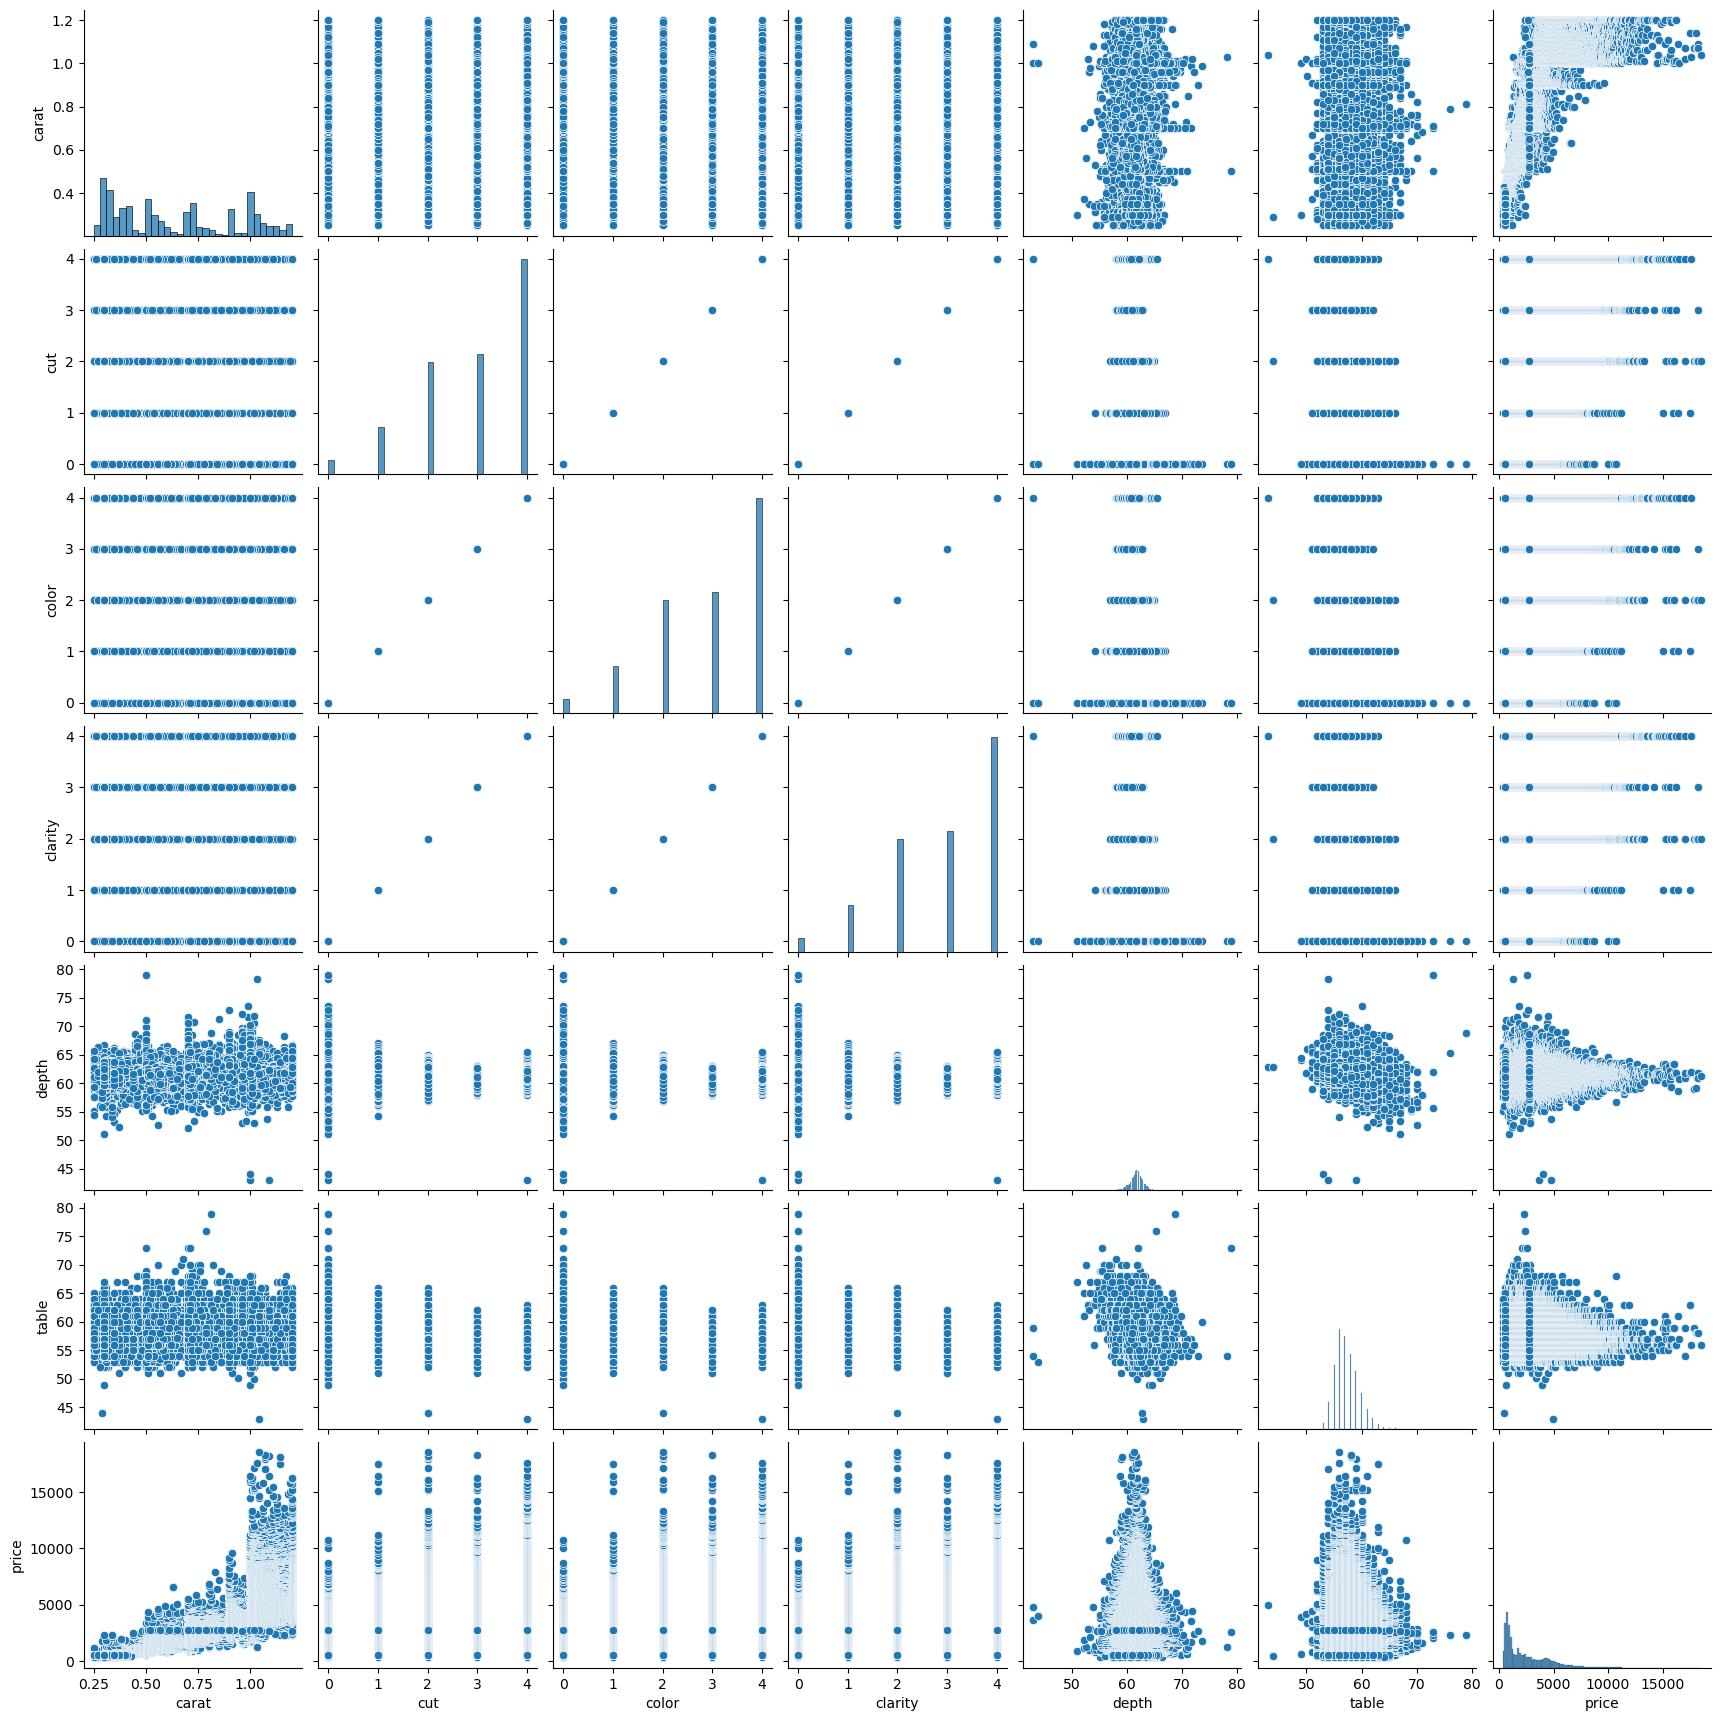

In [31]:
sns.pairplot(df) # plot every column against every column

# 'carat' and 'price' have a linear relationship

<AxesSubplot:>

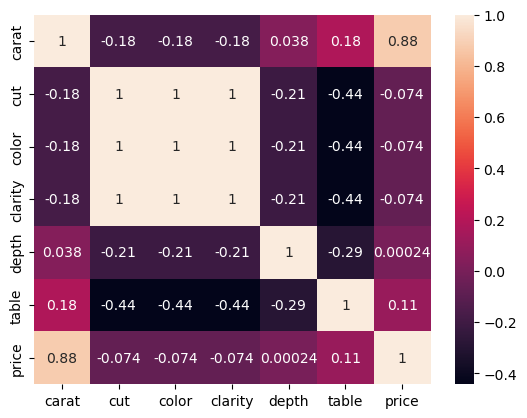

In [32]:
sns.heatmap(df.corr(), annot = True) # what is the relationship between columns?

# there's a strong correlation between 'carat' and 'price'

# Task 7: Conceptualize the Problem

In [33]:
# 'carat' is a unit of mass and has a positive correlation with 'price', which makes sense:
# the larger the diamond, the higher the price.

# Predicting 'price' is a typical regression problem. So let's use three different models:

# Simple Linear Regression
# Multiple Linear Regression
# Decision Tree Regression

# Task 8: Perform Data Split

In [34]:
X = df[['carat']] # only one feature
y = df['price']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(29622, 1)
(14590, 1)
(29622,)
(14590,)


# Task 9: Choose the ML Method to Follow

In [37]:
model = LinearRegression() # instantiate the model

# Task 10: Train the ML Model

In [38]:
model.fit(X_train, y_train) # fit the model

LinearRegression()

In [39]:
# save the model for later
dump(model, 'simple_regression.joblib')

['simple_regression.joblib']

# Task 11: Test the Model

In [40]:
print(model.coef_) # the slope

[6692.49012456]


In [41]:
# The coefficient is positive. Therefore, 1 unit increase in carat is associated with
# more than $6600 increase in price.

In [42]:
# predictions
y_pred = model.predict(X_test)

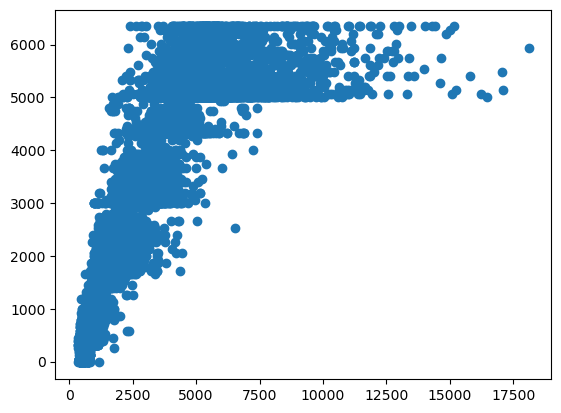

In [43]:
plt.scatter(y_test, y_pred) # how close are our predictions?

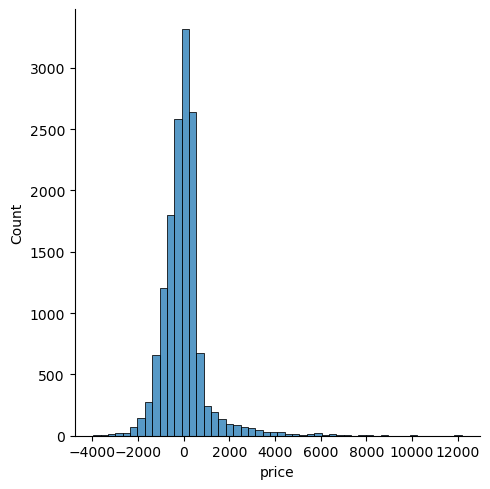

In [44]:
sns.displot((y_test - y_pred), bins = 50) # residual plot

In [45]:
mse = metrics.mean_squared_error(y_test, y_pred) # mean squared error

In [46]:
np.sqrt(mse) # root mean squared error; this is our performance measure

1032.6823495276928

In [47]:
# next model: multiple regression

df.head()

carat  cut  color  clarity  depth  table  price
3    0.29    3      3        3   62.4   58.0    334
4    0.31    1      1        1   63.3   58.0    335
7    0.26    2      2        2   61.9   55.0    337
10   0.30    1      1        1   64.0   55.0    339
13   0.31    4      4        4   62.2   54.0    344

In [48]:
scaler = StandardScaler() # we're going to scale the features

In [49]:
features = df.drop(['price'], axis = 1) # all columns except 'price'
features.head()

carat  cut  color  clarity  depth  table
3    0.29    3      3        3   62.4   58.0
4    0.31    1      1        1   63.3   58.0
7    0.26    2      2        2   61.9   55.0
10   0.30    1      1        1   64.0   55.0
13   0.31    4      4        4   62.2   54.0

In [50]:
df.columns[0:6]

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table'], dtype='object')

In [51]:
scaled_features = scaler.fit_transform(features)

In [52]:
type(scaled_features)

numpy.ndarray

In [53]:
# save the X array for later
np.save('features.npy', scaled_features)

In [54]:
X = pd.DataFrame(scaled_features, columns = df.columns[0:6])
X.head()

carat       cut     color   clarity     depth     table
0 -1.208360  0.058916  0.058916  0.058916  0.462594  0.294839
1 -1.138663 -1.725789 -1.725789 -1.725789  1.104188  0.294839
2 -1.312906 -0.833437 -0.833437 -0.833437  0.106153 -1.052933
3 -1.173512 -1.725789 -1.725789 -1.725789  1.603205 -1.052933
4 -1.138663  0.951268  0.951268  0.951268  0.320018 -1.502191

In [55]:
y.head() # y stays the same

3     334
4     335
7     337
10    339
13    344
Name: price, dtype: int64

In [56]:
# save Y for later
np.save('price.npy', y)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [58]:
model = LinearRegression() # instantiate the model

In [59]:
model.fit(X_train, y_train) # fit the model

LinearRegression()

In [60]:
# save the model for later
dump(model, 'multiple_regression.joblib')

['multiple_regression.joblib']

In [61]:
print(model.coef_)

[1963.25110751   45.01046146   45.01046146   45.01046146  -71.28639623
  -86.94439747]


In [62]:
# predictions
y_pred = model.predict(X_test)

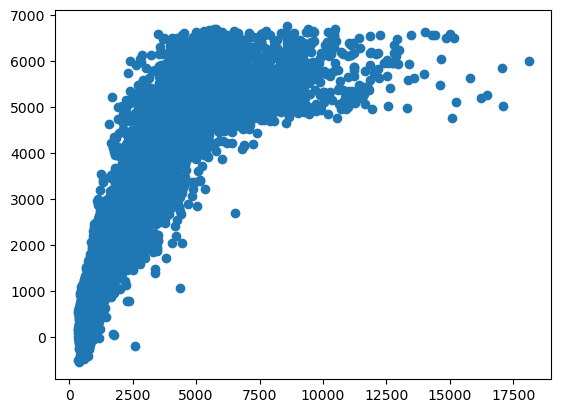

In [63]:
plt.scatter(y_test, y_pred) # how close are our predictions?

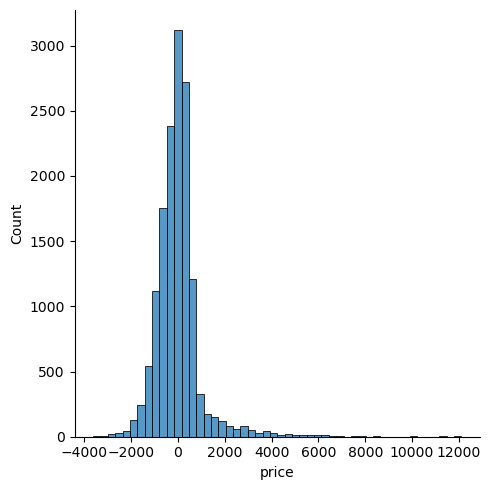

In [64]:
sns.displot((y_test - y_pred), bins = 50) # residual plot

In [65]:
mse = metrics.mean_squared_error(y_test, y_pred) # mean squared error

In [66]:
np.sqrt(mse) # root mean squared error

1013.4172836449808

In [67]:
# next model: decision tree regression
X.head()

carat       cut     color   clarity     depth     table
0 -1.208360  0.058916  0.058916  0.058916  0.462594  0.294839
1 -1.138663 -1.725789 -1.725789 -1.725789  1.104188  0.294839
2 -1.312906 -0.833437 -0.833437 -0.833437  0.106153 -1.052933
3 -1.173512 -1.725789 -1.725789 -1.725789  1.603205 -1.052933
4 -1.138663  0.951268  0.951268  0.951268  0.320018 -1.502191

In [68]:
model = DecisionTreeRegressor() # instantiate the model

In [69]:
model.fit(X_train, y_train) # fit the model

DecisionTreeRegressor()

In [70]:
# save the model for later
dump(model, 'decision_tree.joblib')

['decision_tree.joblib']

In [71]:
# predictions
y_pred = model.predict(X_test)

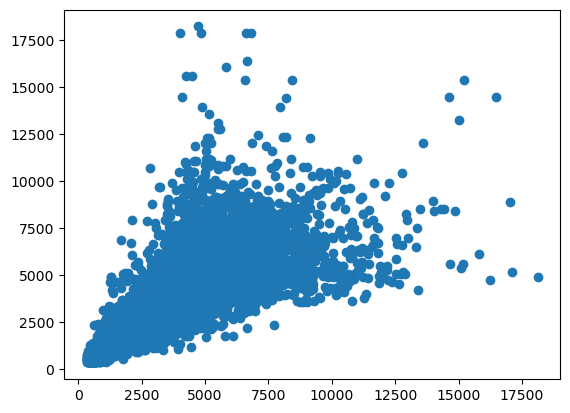

In [72]:
plt.scatter(y_test, y_pred) # how close are our predictions?

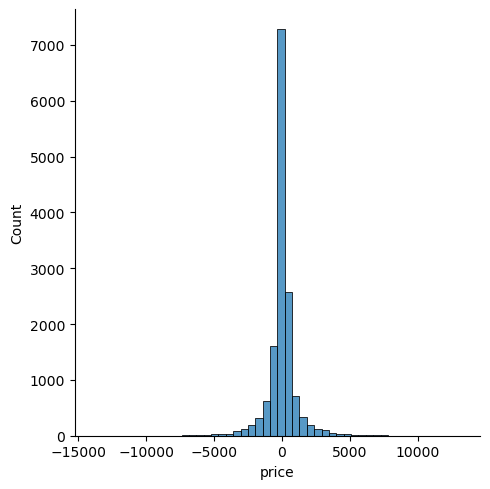

In [73]:
sns.displot((y_test - y_pred), bins = 50) # residual plot

In [74]:
mse = metrics.mean_squared_error(y_test, y_pred) # mean squared error

In [75]:
np.sqrt(mse) # root mean squared error

1188.278372165346

In [76]:
# Of the three models--simple regression, multiple regression, and decision tree regression--our second model
# returned the lowest RMSE value.

# In the next notebook we'll continue with predictions.